In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('/Users/saninzulphi/Downloads/zomato.csv')

In [3]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-07-23,116.000000,138.899994,115.000000,126.000000,126.000000,694895290
1,2021-07-26,126.349998,143.750000,125.300003,140.649994,140.649994,249723854
2,2021-07-27,141.699997,147.800003,127.750000,132.899994,132.899994,240341900
3,2021-07-28,131.000000,135.000000,123.550003,131.199997,131.199997,159793731
4,2021-07-29,134.949997,144.000000,132.199997,141.550003,141.550003,117973089


In [5]:
data.shape

(631, 7)

In [4]:
data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

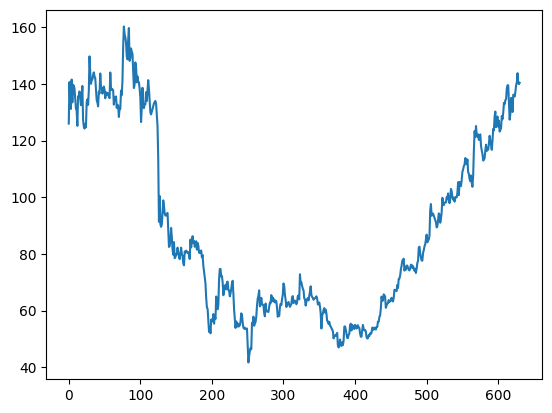

In [7]:
plt.plot(data['Close'])
plt.show()

In [13]:
from sklearn.preprocessing import MinMaxScaler

columns=['Open','High','Low','Close','Volume','Adj Close']

# Assuming 'data' is your DataFrame
for i in columns:
    scaler = MinMaxScaler()
    data[[i]] = scaler.fit_transform(data[[i]])

In [20]:
data['Date'] = pd.to_datetime(data['Date'])

# Step 2: Encode Date Values
# Example of one-hot encoding for month and day of the week
data['Month'] = data['Date'].dt.month
data['DayOfWeek'] = data['Date'].dt.dayofweek

# Step 3: Drop or Modify Date Column
# You can drop the original 'Date' column if you don't need it anymore
data.drop(columns=['Date'], inplace=True)

In [21]:
data.head()

,Open,High,Low,Close,Adj Close,Volume,Month,DayOfWeek
0,0.624688,0.758427,0.654641,0.710914,0.710914,1.000000,7,4
1,0.710723,0.797352,0.745271,0.834387,0.834387,0.359369,7,0
2,0.838321,0.829856,0.766828,0.769069,0.769069,0.345868,7,1
3,0.749377,0.727127,0.729872,0.754741,0.754741,0.229954,7,2
4,0.782211,0.799358,0.805983,0.841972,0.841972,0.169771,7,3


In [22]:
x = data.drop('Close',axis=1)
y = data['Close']

In [23]:
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=42)

In [24]:
from keras.layers import LSTM,Dropout,Dense
from keras.models import Sequential

model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mse',optimizer='adam')
model.summary()

/Users/saninzulphi/Library/Python/3.11/lib/python/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                   │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 100, 50)        │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
history=model.fit(xtrain,ytrain,validation_data=(xtest,ytest),epochs=100,batch_size=64,verbose=0)

<Axes: >

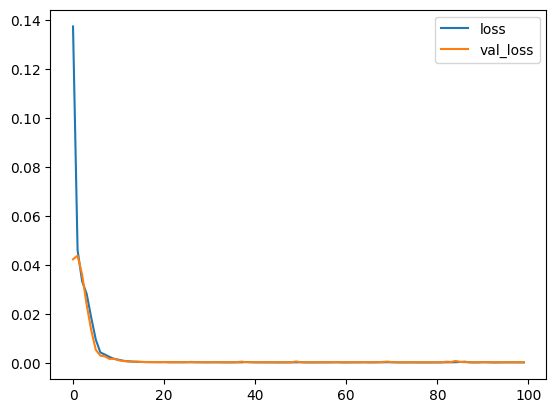

In [27]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()

In [28]:
train_predict=model.predict(xtrain) #prediction
test_predict=model.predict(xtest)

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


In [29]:
from sklearn.metrics import mean_squared_error
import math

print(math.sqrt(mean_squared_error(ytrain,train_predict)))
print(math.sqrt(mean_squared_error(ytest,test_predict)))

0.017604520934385987
0.02065756352843943
